## PART 1: Dimensionality Reduction with PCA


In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from prettytable import PrettyTable
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Replace 'path_to_dataset' with the actual path to dataset folder
dataset_folder = "Dataset2"
# Old and new folder names
old_folder_name = 'googse'
new_folder_name = 'goose'
# Create the full paths to the old and new folders
old_folder_path = os.path.join(dataset_folder, old_folder_name)
new_folder_path = os.path.join(dataset_folder, new_folder_name)
# Rename the folder
os.rename(old_folder_path, new_folder_path)

print(f'The folder "{old_folder_name}" has been renamed to "{new_folder_name}".')

The folder "googse" has been renamed to "goose".


In [3]:
dataset_folder = "Dataset1"
image_files = [f for f in os.listdir(dataset_folder) if os.path.isfile(os.path.join(dataset_folder, f))]

In [4]:
#to store image matrices
image_matrices = []

for filename in os.listdir(dataset_folder):
    if filename.endswith(".bmp"):
        # Open the image using Pillow
        image_path = os.path.join(dataset_folder, filename)
        image = Image.open(image_path)
        # Get pixel data as a flat 1D array
        image_data = np.array(image.getdata())
        # Append the image data to the list
        image_matrices.append(image_data)
#create the matrix M
M = np.array(image_matrices).T

In [5]:
M.shape

(65536, 11)

In [6]:
# Calculate the mean vector
mean_vector = np.mean(M, axis=0)

# Create the normalized matrix D by subtracting the mean vector from M
D = M - mean_vector.reshape(1, -1)
D.shape

(65536, 11)

In [7]:
#covariance matrix
Cov = np.dot(D.T, D)
Cov.shape

(11, 11)

In [8]:
# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(Cov)

# eigenvalues is an array of shape (11,) containing the eigenvalues
# eigenvectors is a matrix of shape (11, 11) where each column is an eigenvector

In [9]:
# Sort eigenvectors by eigenvalues in descending order
eigenvalue_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[eigenvalue_indices]
sorted_eigenvectors = eigenvectors[:, eigenvalue_indices]

# Choose the first n eigenvectors
n = 3 
S = sorted_eigenvectors[:, :n]
S
# S is an 11x3 matrix containing the first n eigenvectors sorted by eigenvalues

array([[ 0.2975806 , -0.20626444, -0.15380779],
       [ 0.29064631, -0.5079205 ,  0.04266849],
       [ 0.29723794, -0.48131324, -0.01865528],
       [ 0.30223277, -0.2745906 , -0.34810651],
       [ 0.30818754,  0.14759174,  0.03297472],
       [ 0.30832547,  0.2904732 , -0.13560837],
       [ 0.30101847,  0.3141232 , -0.08832104],
       [ 0.3056958 ,  0.31486875, -0.40439093],
       [ 0.28747077,  0.00888078,  0.77644144],
       [ 0.30388486,  0.29162653,  0.20867665],
       [ 0.31334297,  0.05753866,  0.12561674]])

In [10]:
sorted_eigenvalues

array([6.45269237e+09, 3.61788877e+08, 1.55372492e+08, 1.21129684e+08,
       9.91281765e+07, 7.96245923e+07, 6.86769042e+07, 5.41515771e+07,
       4.82669661e+07, 4.31537980e+07, 2.90717822e+07])

In [11]:
#This code calculates and prints the percentage of variance explained by each principal component.

# Calculate the total sum of eigenvalues
total_eigenvalue = np.sum(sorted_eigenvalues)

# Calculate the proportion of variance explained by each principal component
variance_proportion = eigenvalues / total_eigenvalue

# Print the results
for i, proportion in enumerate(variance_proportion, 1):
    print(f'PC{i}: {proportion * 100:.2f}%')

PC1: 85.89%
PC2: 4.82%
PC3: 2.07%
PC4: 1.61%
PC5: 1.32%
PC6: 0.39%
PC7: 1.06%
PC8: 0.91%
PC9: 0.72%
PC10: 0.57%
PC11: 0.64%


In [12]:
# Calculate the matrix multiplication D @ S and name it as I
I = D @ S
I.shape

(65536, 3)

In [13]:
# Calculate the projection of all images into the lower-dimensional space
projection = I.T @ D
projection.shape

(3, 11)

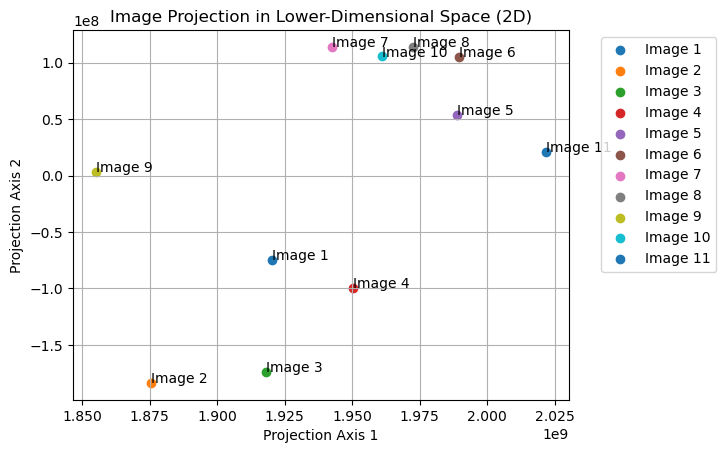

In [14]:
# Plot the projection results
fig, ax = plt.subplots()
for i in range(11):
    plt.scatter(projection[0, i], projection[1, i], label=f"Image {i+1}")

ax.set_xlabel("Projection Axis 1")
ax.set_ylabel("Projection Axis 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

for i in range(11):
    plt.annotate(f"Image {i+1}", (projection[0, i], projection[1, i]))

# Show the plot
plt.title("Image Projection in Lower-Dimensional Space (2D)")
plt.grid(True)
plt.show()

Here you will see a one cluster.

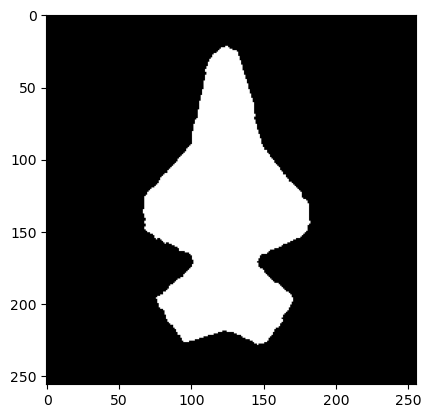

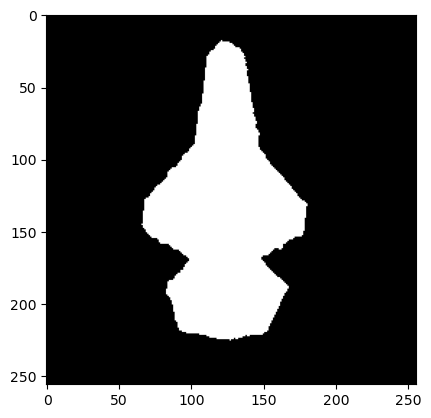

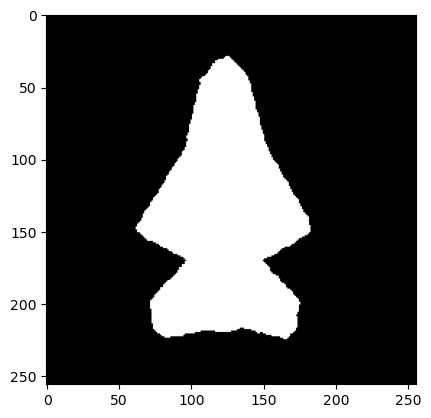

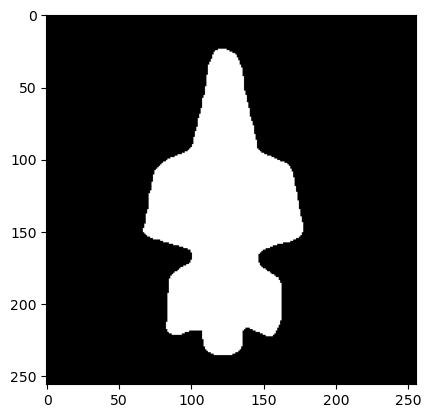

In [15]:
image = Image.open("Dataset1/Aligned_Fighter06.bmp")
rgb_image = image.convert("RGB")
plt.imshow(rgb_image)
plt.show()
image = Image.open("Dataset1/Aligned_Fighter07.bmp")
rgb_image = image.convert("RGB")
plt.imshow(rgb_image)
plt.show()
image = Image.open("Dataset1/Aligned_Fighter08.bmp")
rgb_image = image.convert("RGB")
plt.imshow(rgb_image)
plt.show()
image = Image.open("Dataset1/Aligned_Fighter10.bmp")
rgb_image = image.convert("RGB")
plt.imshow(rgb_image)
plt.show()

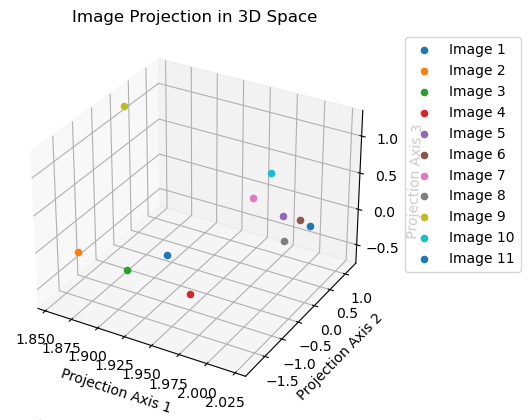

In [16]:
# Create a 3D scatter plot
projection_3d = projection[:3, :]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(11):
    ax.scatter(projection_3d[0, i], projection_3d[1, i], projection_3d[2, i], label=f"Image {i+1}")

# Add labels and a legend
ax.set_xlabel("Projection Axis 1")
ax.set_ylabel("Projection Axis 2")
ax.set_zlabel("Projection Axis 3")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Image Projection in 3D Space")
plt.grid(True)
plt.show()

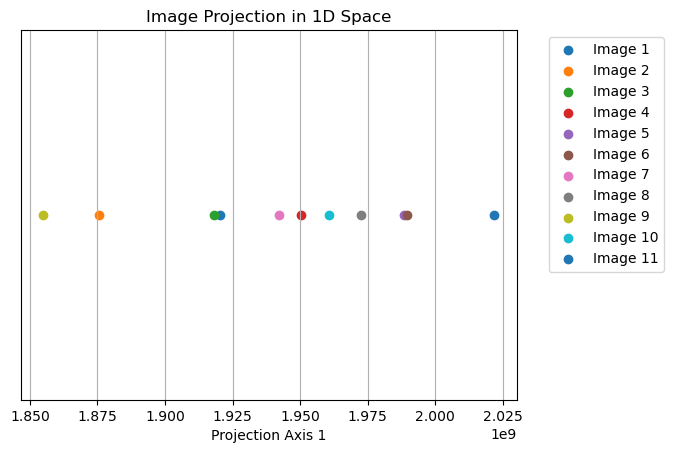

In [17]:
# Create a 1D scatter plot
projection_1d = projection[0, :]

for i in range(11):
    plt.scatter(projection_1d[i], 0, label=f"Image {i+1}")

# Add labels and a legend
plt.xlabel("Projection Axis 1")
plt.yticks([])  # Hide the y-axis
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Image Projection in 1D Space")
plt.grid(True)
plt.show()


## PART 2: Image Retrieval


## Histogram

In [18]:
# Define the number of bins for the histogram
num_bins = 256

In [19]:
def calculate_histogram(image):
    histogram = np.zeros((num_bins, 3), dtype=int)

    for channel in range(3):  # Loop over each channel (R, G, B)
        values = image[:, :, channel].flatten()
        histogram[:, channel] = [np.sum(values == i) for i in range(num_bins)]

    return histogram.flatten()

In [20]:
# Initialize lists to store feature vectors and labels
query_feature_vectors = []
query_labels = []
dataset2_feature_vectors = []
dataset2_labels = []
query_images_folder = "Dataset2/QUERY_IMAGES"
dataset2_folder = "Dataset2"


In [21]:
# Loop through query images
for filename in os.listdir(query_images_folder):
    if filename.endswith(".jpg"):
        image_path = os.path.join(query_images_folder, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (256, 256))
        # Calculate the color histogram
        feature_vector = calculate_histogram(image)
        # Append the feature vector and label to the lists
        query_feature_vectors.append(feature_vector)
        query_labels.append(filename.split("_")[0])  # Extract label from filename

In [22]:
# Loop through dataset 2 images
for class_name in os.listdir(dataset2_folder):
    if class_name != "QUERY_IMAGES":
        class_folder = os.path.join(dataset2_folder, class_name)
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                if filename.endswith(".jpg"):
                    image_path = os.path.join(class_folder, filename)
                    image = cv2.imread(image_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, (256, 256))
                    # Calculate the color histogram
                    feature_vector = calculate_histogram(image)
                    # Append the feature vector and label to the lists
                    dataset2_feature_vectors.append(feature_vector)
                    dataset2_labels.append(class_name)

In [23]:
# Convert lists to NumPy arrays
query_feature_vectors = np.array(query_feature_vectors)
query_labels = np.array(query_labels)
dataset2_feature_vectors = np.array(dataset2_feature_vectors)
dataset2_labels = np.array(dataset2_labels)

In [24]:
def calculate_euclidean_distance(vector1, vector2):
    squared_diff = np.square(vector1 - vector2)
    sum_squared_diff = np.sum(squared_diff)
    
    # Check for non-negative value before taking the square root
    if sum_squared_diff >= 0:
        euclidean_distance = np.sqrt(sum_squared_diff)
    else:
        # If sum_squared_diff is negative (due to numerical issues), set distance to a large positive value
        euclidean_distance = np.inf
    
    return euclidean_distance

In [25]:
# Initialize a list to store the results for each query image
query_results = []

In [26]:
def calculate_precision_at_k(relevant_images, true_label, k):
    relevant_count = sum(1 for _, predicted_label in relevant_images[:k] if predicted_label == true_label)
    precision_at_k = relevant_count / k if relevant_count > 0 else 0.0
    return precision_at_k

In [27]:
def calculate_average_precision(relevant_images, true_label):
    precision_sum = 0.0
    relevant_count = sum(1 for _, predicted_label in relevant_images if predicted_label == true_label)
    if relevant_count == 0:
        return 0.0
    for i, (_, predicted_label) in enumerate(relevant_images, 1):
        if predicted_label == true_label:
            precision_sum += calculate_precision_at_k(relevant_images, true_label, i)
    return precision_sum / relevant_count

In [28]:
def calculate_map(query_results, query_labels):
    class_precisions = {}
    for query_result, true_label in zip(query_results, query_labels):
        relevant_images = query_result['relevant_images']
        query_index = query_result['query_index']
        average_precision = calculate_average_precision(relevant_images, true_label)
        if true_label not in class_precisions:
            class_precisions[true_label] = []
        class_precisions[true_label].append(average_precision)
    mean_class_map = {}
    for true_label, ap_list in class_precisions.items():
        mean_class_map[true_label] = np.mean(ap_list)
    mean_average_precision = np.mean(list(mean_class_map.values()))
    return mean_class_map, mean_average_precision

### FIRST TRY, TAKING MOST 10 RELEVANT IMAGES(Experiment 4 in report)

In [29]:
# Loop through each query image
for query_index in range(len(query_feature_vectors)):
    query_features = query_feature_vectors[query_index]
    distances = []
    # Loop through each dataset2 image
    for dataset2_index in range(len(dataset2_feature_vectors)):
        dataset2_features = dataset2_feature_vectors[dataset2_index]
        distance = calculate_euclidean_distance(query_features, dataset2_features)
        distances.append((distance, dataset2_labels[dataset2_index]))
    # Sort distances by ascending order
    distances.sort(key=lambda x: x[0])
    # Extract the top 10 most similar images
    relevant_images = distances[:10]
    query_results.append({
        'query_index': query_index,
        'relevant_images': relevant_images
    })

In [30]:
# Print or further process the query results
for result in query_results:
    print(f"Query Image {result['query_index'] + 1}:")
    for distance, label in result['relevant_images']:
        print(f"  Distance: {distance}, Label: {label}")
    print()

Query Image 1:
  Distance: 10031.83263417009, Label: airplane
  Distance: 10413.413561364016, Label: airplane
  Distance: 10480.653605572508, Label: airplane
  Distance: 10873.35164519202, Label: airplane
  Distance: 11127.006515680667, Label: airplane
  Distance: 11536.909984913638, Label: airplane
  Distance: 11637.487787319049, Label: bonsai
  Distance: 11859.916104256386, Label: airplane
  Distance: 11994.798372628029, Label: bonsai
  Distance: 12181.953620006932, Label: airplane

Query Image 2:
  Distance: 0.0, Label: airplane
  Distance: 6570.949703049019, Label: airplane
  Distance: 6624.069896974216, Label: dog
  Distance: 6967.739088111724, Label: airplane
  Distance: 7365.494144998012, Label: goat
  Distance: 7504.342609449544, Label: ibis
  Distance: 7984.521776537403, Label: goat
  Distance: 8162.392051353574, Label: goat
  Distance: 8280.111231136934, Label: cactus
  Distance: 8445.8784031029, Label: cactus

Query Image 3:
  Distance: 3769.383503969847, Label: cactus
  Dis

In [31]:
query_results

[{'query_index': 0,
  'relevant_images': [(10031.83263417009, 'airplane'),
   (10413.413561364016, 'airplane'),
   (10480.653605572508, 'airplane'),
   (10873.35164519202, 'airplane'),
   (11127.006515680667, 'airplane'),
   (11536.909984913638, 'airplane'),
   (11637.487787319049, 'bonsai'),
   (11859.916104256386, 'airplane'),
   (11994.798372628029, 'bonsai'),
   (12181.953620006932, 'airplane')]},
 {'query_index': 1,
  'relevant_images': [(0.0, 'airplane'),
   (6570.949703049019, 'airplane'),
   (6624.069896974216, 'dog'),
   (6967.739088111724, 'airplane'),
   (7365.494144998012, 'goat'),
   (7504.342609449544, 'ibis'),
   (7984.521776537403, 'goat'),
   (8162.392051353574, 'goat'),
   (8280.111231136934, 'cactus'),
   (8445.8784031029, 'cactus')]},
 {'query_index': 2,
  'relevant_images': [(3769.383503969847, 'cactus'),
   (4208.9749345891805, 'goat'),
   (4237.619142867844, 'goat'),
   (4327.480791407398, 'cactus'),
   (4333.397973876851, 'cactus'),
   (4352.149813597873, 'goose

In [32]:
# Calculate MAP for each class and dataset
class_map, map_result = calculate_map(query_results, query_labels)

In [33]:
# Print the results
print("Class-wise Mean Average Precision:")
for true_label, ap in class_map.items():
    print(f"{true_label}: {ap}")

Class-wise Mean Average Precision:
airplane: 0.9380208333333333
bear: 0.25
blimp: 0.0
bonsai: 0.9166666666666666
cactus: 0.3714285714285714
dog: 0.05
goat: 0.09722222222222221
goose: 0.13680555555555557
ibis: 0.08333333333333333
iris: 0.7416666666666667


In [34]:
print("Mean Average Precision (MAP) across all classes:")
print(f"{map_result}")

Mean Average Precision (MAP) across all classes:
0.3585143849206349


In [35]:
query_results

[{'query_index': 0,
  'relevant_images': [(10031.83263417009, 'airplane'),
   (10413.413561364016, 'airplane'),
   (10480.653605572508, 'airplane'),
   (10873.35164519202, 'airplane'),
   (11127.006515680667, 'airplane'),
   (11536.909984913638, 'airplane'),
   (11637.487787319049, 'bonsai'),
   (11859.916104256386, 'airplane'),
   (11994.798372628029, 'bonsai'),
   (12181.953620006932, 'airplane')]},
 {'query_index': 1,
  'relevant_images': [(0.0, 'airplane'),
   (6570.949703049019, 'airplane'),
   (6624.069896974216, 'dog'),
   (6967.739088111724, 'airplane'),
   (7365.494144998012, 'goat'),
   (7504.342609449544, 'ibis'),
   (7984.521776537403, 'goat'),
   (8162.392051353574, 'goat'),
   (8280.111231136934, 'cactus'),
   (8445.8784031029, 'cactus')]},
 {'query_index': 2,
  'relevant_images': [(3769.383503969847, 'cactus'),
   (4208.9749345891805, 'goat'),
   (4237.619142867844, 'goat'),
   (4327.480791407398, 'cactus'),
   (4333.397973876851, 'cactus'),
   (4352.149813597873, 'goose

(0.0, 1.0)

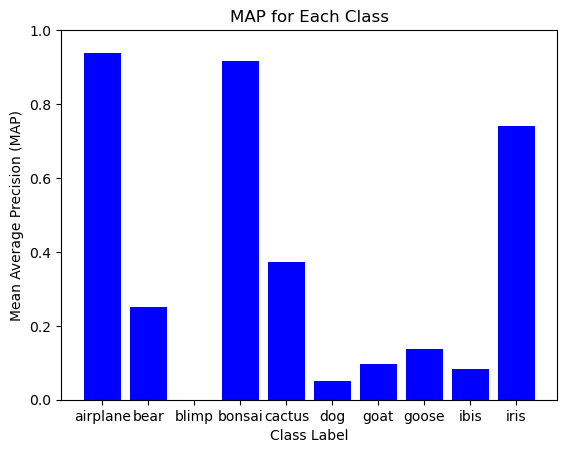

In [36]:
# Extract class labels and corresponding MAP values
class_labels = list(class_map.keys())
map_values = list(class_map.values())

# Plotting
plt.bar(class_labels, map_values, color='blue')
plt.xlabel('Class Label')
plt.ylabel('Mean Average Precision (MAP)')
plt.title('MAP for Each Class')
plt.ylim(0, 1)  # Set y-axis limit

### SECOND TRY, TAKING ALL 300 IMAGES

In [37]:
query_results = []

In [38]:
# Loop through each query image
for query_index in range(len(query_feature_vectors)):
    query_features = query_feature_vectors[query_index]
    distances = []
    # Loop through each dataset2 image
    for dataset2_index in range(len(dataset2_feature_vectors)):
        dataset2_features = dataset2_feature_vectors[dataset2_index]
        distance = calculate_euclidean_distance(query_features, dataset2_features)
        distances.append((distance, dataset2_labels[dataset2_index]))
    # Sort distances by ascending order
    distances.sort(key=lambda x: x[0])
    relevant_images = distances[:]
    # Append the results for the current query image to the main list
    query_results.append({
        'query_index': query_index,
        'relevant_images': relevant_images
})

In [39]:
# Print or further process the query results
for result in query_results:
    print(f"Query Image {result['query_index'] + 1}:")
    for distance, label in result['relevant_images']:
        print(f"  Distance: {distance}, Label: {label}")
    print()

Query Image 1:
  Distance: 10031.83263417009, Label: airplane
  Distance: 10413.413561364016, Label: airplane
  Distance: 10480.653605572508, Label: airplane
  Distance: 10873.35164519202, Label: airplane
  Distance: 11127.006515680667, Label: airplane
  Distance: 11536.909984913638, Label: airplane
  Distance: 11637.487787319049, Label: bonsai
  Distance: 11859.916104256386, Label: airplane
  Distance: 11994.798372628029, Label: bonsai
  Distance: 12181.953620006932, Label: airplane
  Distance: 12571.800348398792, Label: blimp
  Distance: 12660.79942183747, Label: dog
  Distance: 12688.5697381541, Label: airplane
  Distance: 13059.359172639368, Label: dog
  Distance: 13210.641770936036, Label: bear
  Distance: 13244.294394191033, Label: dog
  Distance: 13268.175232487698, Label: ibis
  Distance: 13277.826780011856, Label: ibis
  Distance: 13496.925649939692, Label: airplane
  Distance: 13515.913731598022, Label: bear
  Distance: 13627.824844779889, Label: goose
  Distance: 13728.43581

In [40]:
# Calculate MAP for each class and dataset
class_map, map_result = calculate_map(query_results, query_labels)


In [41]:
# Print the results
print("Class-wise Mean Average Precision:")
for true_label, ap in class_map.items():
    print(f"{true_label}: {ap}")

Class-wise Mean Average Precision:
airplane: 0.29122986038563947
bear: 0.12198380477368591
blimp: 0.06548257745749796
bonsai: 0.1273644988417558
cactus: 0.15786600443225174
dog: 0.12101000471629428
goat: 0.16555007742665268
goose: 0.1505029322969063
ibis: 0.09866691746392318
iris: 0.20431868552796761


In [42]:
print("Mean Average Precision (MAP) across all classes:")
print(f"{map_result}")

Mean Average Precision (MAP) across all classes:
0.15039753633225747


(0.0, 1.0)

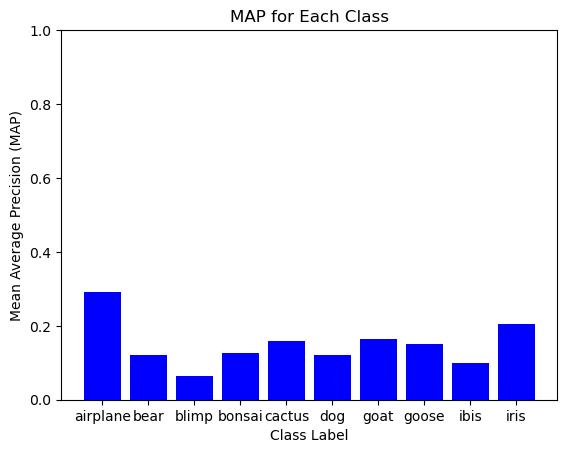

In [43]:
# Extract class labels and corresponding MAP values
class_labels = list(class_map.keys())
map_values = list(class_map.values())

# Plotting
plt.bar(class_labels, map_values, color='blue')
plt.xlabel('Class Label')
plt.ylabel('Mean Average Precision (MAP)')
plt.title('MAP for Each Class')
plt.ylim(0, 1)  # Set y-axis limit

### Histogram on different color space (HSV and LAB)

In [44]:
def calculate_histogram(image, color_space):
    if color_space == 'HSV':
        hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        num_bins = [180, 256, 256]  # HSV ranges: H (0-179), S (0-255), V (0-255)
        histogram = np.zeros((sum(num_bins),), dtype=int)

        for channel in range(3):  # Loop over each channel (H, S, V)
            values = hsv_image[:, :, channel].flatten()
            histogram[sum(num_bins[:channel]):sum(num_bins[:channel + 1])] = \
                [np.sum(values == i) for i in range(num_bins[channel])]

    elif color_space == 'LAB':
        lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
        num_bins = [256, 256, 256]  # LAB ranges: L (0-255), A (0-255), B (0-255)
        histogram = np.zeros((sum(num_bins),), dtype=int)

        for channel in range(3):  # Loop over each channel (L, A, B)
            values = lab_image[:, :, channel].flatten()
            histogram[sum(num_bins[:channel]):sum(num_bins[:channel + 1])] = \
                [np.sum(values == i) for i in range(num_bins[channel])]

    return histogram


In [45]:
# Initialize lists to store feature vectors and labels
query_feature_vectors_hsv = []
dataset2_feature_vectors_hsv = []

In [46]:
# Loop through query images
for filename in os.listdir(query_images_folder):
    if filename.endswith(".jpg"):
        image_path = os.path.join(query_images_folder, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (256, 256))
        feature_vector = calculate_histogram(image,"HSV")
        query_feature_vectors_hsv.append(feature_vector)
          
# Loop through dataset 2 images
for class_name in os.listdir(dataset2_folder):
    if class_name != "QUERY_IMAGES":
        class_folder = os.path.join(dataset2_folder, class_name)
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                if filename.endswith(".jpg"):
                    image_path = os.path.join(class_folder, filename)
                    image = cv2.imread(image_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, (256, 256))
                    feature_vector = calculate_histogram(image,"HSV")
                    dataset2_feature_vectors_hsv.append(feature_vector)

In [47]:
query_feature_vectors_lab = []
dataset2_feature_vectors_lab = []

In [48]:
# Loop through query images
for filename in os.listdir(query_images_folder):
    if filename.endswith(".jpg"):
        image_path = os.path.join(query_images_folder, filename)   
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (256, 256))
        feature_vector = calculate_histogram(image,"LAB")
        query_feature_vectors_lab.append(feature_vector)
        
# Loop through dataset 2 images
for class_name in os.listdir(dataset2_folder):
    if class_name != "QUERY_IMAGES":
        class_folder = os.path.join(dataset2_folder, class_name)
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                if filename.endswith(".jpg"):
                    image_path = os.path.join(class_folder, filename)
                    image = cv2.imread(image_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, (256, 256))
                    feature_vector = calculate_histogram(image,"LAB")
                    dataset2_feature_vectors_lab.append(feature_vector)

In [49]:
query_results_hsv = []

In [50]:
query_results_lab = []

In [51]:
# Loop through each query image
for query_index in range(len(query_feature_vectors_hsv)):
    query_features = query_feature_vectors_hsv[query_index]
    distances = []
    
    # Loop through each dataset2 image
    for dataset2_index in range(len(dataset2_feature_vectors_hsv)):
        dataset2_features = dataset2_feature_vectors_hsv[dataset2_index]
        distance = calculate_euclidean_distance(query_features, dataset2_features)
        distances.append((distance, dataset2_labels[dataset2_index]))
    
    # Sort distances by ascending order
    distances.sort(key=lambda x: x[0])
    relevant_images = distances[:]
    query_results_hsv.append({
        'query_index': query_index,
        'relevant_images': relevant_images
    })

In [52]:
# Loop through each query image
for query_index in range(len(query_feature_vectors_lab)):
    query_features = query_feature_vectors_lab[query_index]
    
    # Initialize a list to store distances for the current query image
    distances = []
    
    # Loop through each dataset2 image
    for dataset2_index in range(len(dataset2_feature_vectors_lab)):
        dataset2_features = dataset2_feature_vectors_lab[dataset2_index]
        
        # Calculate Euclidean distance
        distance = calculate_euclidean_distance(query_features, dataset2_features)
        
        # Append the distance and the corresponding label to the list
        distances.append((distance, dataset2_labels[dataset2_index]))
    
    # Sort distances by ascending order
    distances.sort(key=lambda x: x[0])
    
    
    relevant_images = distances[:]
    
    # Append the results for the current query image to the main list
    query_results_lab.append({
        'query_index': query_index,
        'relevant_images': relevant_images
    })

In [53]:
# Calculate MAP for each class and dataset
class_map, map_result = calculate_map(query_results_hsv, query_labels)

In [54]:
# Print the results
print("Class-wise Mean Average Precision:")
for true_label, ap in class_map.items():
    print(f"{true_label}: {ap}")

Class-wise Mean Average Precision:
airplane: 0.26747214933210334
bear: 0.1557153544100377
blimp: 0.08276212842198308
bonsai: 0.10379952577981805
cactus: 0.12408575352371382
dog: 0.0946801797316357
goat: 0.1741307673110537
goose: 0.15711546244855704
ibis: 0.1020376033669553
iris: 0.18912189174658822


In [55]:
print("Mean Average Precision (MAP) across all classes:")
print(f"{map_result}")

Mean Average Precision (MAP) across all classes:
0.14509208160724457


In [56]:
# Calculate MAP for each class and dataset
class_map, map_result = calculate_map(query_results_lab, query_labels)

In [57]:
# Print the results
print("\nClass-wise Mean Average Precision:")
for true_label, ap in class_map.items():
    print(f"{true_label}: {ap}")


Class-wise Mean Average Precision:
airplane: 0.19174096592571607
bear: 0.16617152877107916
blimp: 0.10575073978663717
bonsai: 0.10175332640820053
cactus: 0.14046024929808715
dog: 0.10075663298846449
goat: 0.14480729417737817
goose: 0.11352548732865633
ibis: 0.10433020948200172
iris: 0.3330418010059729


In [58]:
print("\nMean Average Precision (MAP) across all classes:")
print(f"{map_result}")


Mean Average Precision (MAP) across all classes:
0.15023382351721937


### KMEANS


Cluster 1:
Query Images in Cluster:
  goose
  ibis
  iris
Dataset2 Images in Cluster:
  bear
  bear
  blimp
  blimp
  blimp
  blimp
  bonsai
  bonsai
  bonsai
  bonsai
  bonsai
  bonsai
  bonsai
  cactus
  cactus
  cactus
  cactus
  dog
  dog
  dog
  dog
  goat
  goat
  goat
  goose
  ibis
  ibis
  ibis
  ibis
  ibis
  ibis
  iris
  iris
  iris
  iris
  iris
  iris
  iris
  iris

Cluster 2:
Query Images in Cluster:
Dataset2 Images in Cluster:
  blimp
  iris

Cluster 3:
Query Images in Cluster:
  dog
Dataset2 Images in Cluster:
  blimp
  blimp
  blimp
  blimp
  blimp
  bonsai
  bonsai

Cluster 4:
Query Images in Cluster:
  airplane
  bear
  blimp
  blimp
  bonsai
  cactus
  dog
  goat
  goat
  goose
  ibis
  iris
Dataset2 Images in Cluster:
  airplane
  airplane
  airplane
  airplane
  airplane
  airplane
  bear
  bear
  bear
  bear
  bear
  bear
  bear
  bear
  bear
  bear
  bear
  bear
  bear
  bear
  bear
  bear
  blimp
  blimp
  blimp
  blimp
  blimp
  blimp
  bonsai
  bonsai
  bon

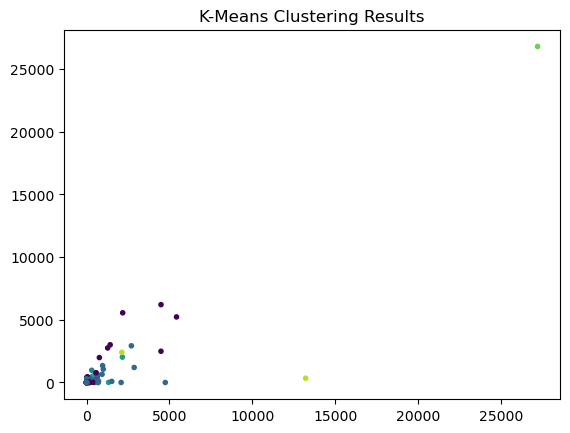

In [59]:
all_feature_vectors = np.concatenate((query_feature_vectors, dataset2_feature_vectors))

# Number of clusters because of the count of classes 
num_clusters = 10

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(all_feature_vectors)

# Separate clusters for query and dataset2 images
query_clusters = clusters[:len(query_feature_vectors)]
dataset2_clusters = clusters[len(query_feature_vectors):]

# Print and visualize results for each cluster
for cluster_num in range(num_clusters):
    # Indices of images in the current cluster
    query_images_in_cluster = np.where(query_clusters == cluster_num)[0]
    dataset2_images_in_cluster = np.where(dataset2_clusters == cluster_num)[0]

    print(f"\nCluster {cluster_num + 1}:")
    
    print("Query Images in Cluster:")
    for index in query_images_in_cluster:
        print(f"  {os.path.basename(os.path.splitext(query_labels[index])[0])}")

    print("Dataset2 Images in Cluster:")
    for index in dataset2_images_in_cluster:
        print(f"  {os.path.basename(dataset2_labels[index])}")

# Visualize results
plt.scatter(all_feature_vectors[:, 0], all_feature_vectors[:, 1], c=clusters, cmap='viridis', marker='.')
plt.title("K-Means Clustering Results")
plt.show()


In [60]:
# Combine feature vectors of both query and dataset2 images
all_feature_vectors = np.concatenate((query_feature_vectors, dataset2_feature_vectors))

# Number of clusters
num_clusters = 10

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(all_feature_vectors)

# Separate clusters for query and dataset2 images
query_clusters = clusters[:len(query_feature_vectors)]
dataset2_clusters = clusters[len(query_feature_vectors):]

# Print or visualize results for each cluster
for cluster_num in range(num_clusters):
    # Indices of images in the current cluster
    query_images_in_cluster = np.where(query_clusters == cluster_num)[0]
    dataset2_images_in_cluster = np.where(dataset2_clusters == cluster_num)[0]

    print(f"\nCluster {cluster_num + 1}:")
    print("Query Images in Cluster:", query_images_in_cluster)
    print("Dataset2 Images in Cluster:", dataset2_images_in_cluster)


Cluster 1:
Query Images in Cluster: [15 17 18]
Dataset2 Images in Cluster: [ 34  35  67  74  75  83 104 105 106 107 108 114 116 131 140 147 148 157
 161 163 170 199 200 203 233 243 247 253 260 264 266 274 277 286 288 290
 292 294 299]

Cluster 2:
Query Images in Cluster: []
Dataset2 Images in Cluster: [ 87 283]

Cluster 3:
Query Images in Cluster: [10]
Dataset2 Images in Cluster: [ 66  68  71  82  84 102 111]

Cluster 4:
Query Images in Cluster: [ 1  2  4  5  7  8 11 12 13 14 16 19]
Dataset2 Images in Cluster: [  0   7   8  10  21  27  31  33  36  37  38  41  42  44  46  47  50  52
  53  55  56  58  65  69  77  79  86  89  90  93  95  99 100 101 112 113
 119 121 124 125 126 127 128 129 130 132 133 135 136 137 138 141 142 143
 145 146 149 150 152 153 154 156 162 164 165 166 167 168 171 173 174 175
 176 179 180 182 183 184 185 187 189 190 191 192 193 195 196 197 198 202
 204 205 207 208 209 210 212 213 214 215 217 219 220 222 224 225 226 229
 231 232 234 238 239 240 241 242 245 246 248 

## PART 3: Logistic Regression

In [61]:
Test_x = []
Test_y = []
Train_x = []
Train_y = []
query_images_folder = "Dataset2/QUERY_IMAGES"
dataset2_folder = "Dataset2"
# Loop through query images
for filename in os.listdir(query_images_folder):
    if filename.endswith(".jpg"):
        image_path = os.path.join(query_images_folder, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (256, 256))
        if(filename.split("_")[0]=="ibis" or filename.split("_")[0]=="airplane"):
            Test_x.append(image.flatten())
            Test_y.append(filename.split("_")[0])

# Loop through dataset 2 images
for class_name in os.listdir(dataset2_folder):
    if class_name != "QUERY_IMAGES":
        class_folder = os.path.join(dataset2_folder, class_name)
        if os.path.isdir(class_folder) and (class_name == "ibis" or class_name == "airplane"):
            for filename in os.listdir(class_folder):
                if filename.endswith(".jpg"):
                    image_path = os.path.join(class_folder, filename)
                    image = cv2.imread(image_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, (256, 256))
                    Train_x.append(image.flatten())
                    Train_y.append(class_name)

In [62]:
# Function to calculate Euclidean distance between two vectors
def euclidean_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)



#########EXAMPLE#########
# Select a query image index
query_index = 0  
query_feature_vector = Train_x[query_index]
distances_by_class = {}

# Calculate distances for each class
for class_name in np.unique(Train_y):
    class_indices = [i for i, label in enumerate(Train_y) if label == class_name]
    class_vectors = [Train_x[i] for i in class_indices]
    distances = [euclidean_distance(query_feature_vector, vector) for vector in class_vectors]
    distances_by_class[class_name] = list(zip(distances, class_indices))

# Sort distances and get the top 10 similar images for each class
top_10_similar_images_by_class = {}
for class_name, distances_and_indices in distances_by_class.items():
    distances_and_indices.sort()  # Sort based on distance
    top_10_similar_images_by_class[class_name] = distances_and_indices[:10]

# Display the top 10 most similar images for each class
for class_name, similar_images in top_10_similar_images_by_class.items():
    print(f"\nTop 10 Similar Images for Class '{class_name}':")
    for distance, index in similar_images:
        print(f"  Distance: {distance}, Index: {index}, Label: {Train_y[index]}")



Top 10 Similar Images for Class 'airplane':
  Distance: 0.0, Index: 0, Label: airplane
  Distance: 53683.22888947721, Index: 13, Label: airplane
  Distance: 54684.92341587396, Index: 11, Label: airplane
  Distance: 55248.5143058164, Index: 12, Label: airplane
  Distance: 58620.76546753718, Index: 8, Label: airplane
  Distance: 58705.08137291013, Index: 23, Label: airplane
  Distance: 61280.559910953816, Index: 10, Label: airplane
  Distance: 61797.29400224576, Index: 9, Label: airplane
  Distance: 62250.595997146884, Index: 27, Label: airplane
  Distance: 63179.19675811018, Index: 5, Label: airplane

Top 10 Similar Images for Class 'ibis':
  Distance: 55626.822522952, Index: 31, Label: ibis
  Distance: 56937.637683697416, Index: 50, Label: ibis
  Distance: 59113.80616235094, Index: 52, Label: ibis
  Distance: 59301.92367031612, Index: 38, Label: ibis
  Distance: 60016.71094786851, Index: 45, Label: ibis
  Distance: 60434.08980865022, Index: 43, Label: ibis
  Distance: 61333.8612024385

In [63]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression hypothesis
def hypothesis(theta, X):
    return sigmoid(np.dot(X, theta))

def cost_function(theta, X, y, epsilon=1e-15):
    m = len(y)
    h = hypothesis(theta, X)
    h = np.clip(h, epsilon, 1 - epsilon)  # Clip values to avoid log(0) or log(1)
    return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

# Gradient descent
def gradient_descent(X, y, theta, learning_rate, num_epochs):
    m = len(y)
    cost_history = []

    for epoch in range(num_epochs):
        h = hypothesis(theta, X)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
        cost = cost_function(theta, X, y)
        cost_history.append(cost)

    return theta, cost_history

# Predict function
def predict(theta, X, threshold=0.5):
    return (hypothesis(theta, X) >= threshold).astype(int)


In [64]:
# Convert labels into numerical values
unique_labels = np.unique(Train_y)
label_to_index = {label: i for i, label in enumerate(unique_labels)}
Train_y_binary = np.array([1 if label == "ibis" else 0 for label in Train_y])

# Normalize features
Train_x_normalized = (np.array(Train_x) - np.mean(Train_x)) / np.std(Train_x)
Train_x_normalized = np.c_[np.ones(Train_x_normalized.shape[0]), Train_x_normalized]

# Initialize parameters
theta = np.zeros(Train_x_normalized.shape[1])

# Train logistic regression model
learning_rate = 0.01
num_epochs = 1000
theta, cost_history = gradient_descent(Train_x_normalized, Train_y_binary, theta, learning_rate, num_epochs)

# Print the learned parameters
print("Learned Parameters:")
print(theta)


# Testing
Test_x_normalized = (np.array(Test_x) - np.mean(Train_x)) / np.std(Train_x)
Test_x_normalized = np.c_[np.ones(Test_x_normalized.shape[0]), Test_x_normalized]

# Predict using the learned parameters
predictions = predict(theta, Test_x_normalized)

# Convert numerical predictions back to class labels
predicted_labels = [unique_labels[i] for i in predictions]

Learned Parameters:
[ 0.00224756 -0.00337651 -0.00301408 ... -0.00205823 -0.00241042
 -0.00271088]


In [65]:
Test_y

['airplane', 'airplane', 'ibis', 'ibis']

In [66]:
# Calculate accuracy
correct_predictions = sum(1 for true_label, predicted_label in zip(Test_y, predicted_labels) if true_label == predicted_label)
accuracy = correct_predictions / len(Test_y) * 100

# Print the predicted labels and accuracy for the test set
print("\nPredicted Labels:")
print(predicted_labels)
print("\nAccuracy: {:.2f}%".format(accuracy))


Predicted Labels:
['airplane', 'airplane', 'ibis', 'ibis']

Accuracy: 100.00%


In [67]:
# Replace 'path_to_dataset' with the actual path to dataset folder
dataset_folder = "Dataset2"

# Old and new folder names
old_folder_name = 'goose'
new_folder_name = 'googse'

# Create the full paths to the old and new folders
old_folder_path = os.path.join(dataset_folder, old_folder_name)
new_folder_path = os.path.join(dataset_folder, new_folder_name)

# Rename the folder
os.rename(old_folder_path, new_folder_path)

print(f'The folder "{old_folder_name}" has been renamed to "{new_folder_name}".')

The folder "goose" has been renamed to "googse".


In [68]:

# Precision values
precision_rgb = [0.29122986038563947, 0.12198380477368591, 0.06548257745749796, 0.1273644988417558, 0.15786600443225174,
                 0.12101000471629428, 0.16555007742665268, 0.1505029322969063, 0.09866691746392318, 0.20431868552796761]

precision_hsv = [0.26747214933210334, 0.1557153544100377, 0.08276212842198308, 0.10379952577981805, 0.12408575352371382,
                 0.0946801797316357, 0.1741307673110537, 0.15711546244855704, 0.1020376033669553, 0.18912189174658822]

precision_lab = [0.19174096592571607, 0.16617152877107916, 0.10575073978663717, 0.10175332640820053, 0.14046024929808715,
                 0.10075663298846449, 0.14480729417737817, 0.11352548732865633, 0.10433020948200172, 0.3330418010059729]

precision_exp4 = [0.9380208333333333, 0.25, 0.0, 0.9166666666666666, 0.3714285714285714, 0.05, 0.09722222222222221,
                  0.13680555555555557, 0.08333333333333333, 0.7416666666666667]
class_names = ["airplane", "bear", "blimp", "bonsai", "cactus", "dog", "goat", "goose", "ibis", "iris"]


# MAP values
map_rgb = 0.15039753633225747
map_hsv = 0.14509208160724457
map_lab = 0.15023382351721937
map_exp4 = 0.3585143849206349

# Create tables
precision_table = PrettyTable()
precision_table.field_names = ["Class", "RGB", "HSV", "LAB", "Experiment 4"]
for i in range(len(class_names)):
    precision_table.add_row([class_names[i], precision_rgb[i], precision_hsv[i], precision_lab[i], precision_exp4[i]])

map_table = PrettyTable()
map_table.field_names = ["Class", "RGB", "HSV", "LAB", "Experiment 4"]
map_table.add_row(["MAP", map_rgb, map_hsv, map_lab, map_exp4])

# Print tables
print("Precision Values:")
print(precision_table)
print("\nMAP Values:")
print(map_table)


Precision Values:
+----------+---------------------+---------------------+---------------------+---------------------+
|  Class   |         RGB         |         HSV         |         LAB         |     Experiment 4    |
+----------+---------------------+---------------------+---------------------+---------------------+
| airplane | 0.29122986038563947 | 0.26747214933210334 | 0.19174096592571607 |  0.9380208333333333 |
|   bear   | 0.12198380477368591 |  0.1557153544100377 | 0.16617152877107916 |         0.25        |
|  blimp   | 0.06548257745749796 | 0.08276212842198308 | 0.10575073978663717 |         0.0         |
|  bonsai  |  0.1273644988417558 | 0.10379952577981805 | 0.10175332640820053 |  0.9166666666666666 |
|  cactus  | 0.15786600443225174 | 0.12408575352371382 | 0.14046024929808715 |  0.3714285714285714 |
|   dog    | 0.12101000471629428 |  0.0946801797316357 | 0.10075663298846449 |         0.05        |
|   goat   | 0.16555007742665268 |  0.1741307673110537 | 0.14480729417737